In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

train_data = np.loadtxt('iris-train.txt')
test_data = np.loadtxt('iris-test.txt')

train_label = train_data[:,0]
test_label = test_data[:,0]

train_temp = train_data[:,1:]
test_temp = test_data[:,1:]

train_mu = np.mean(train_temp)
train_ft = np.subtract(train_temp, train_mu)
test_ft = np.subtract(test_temp, train_mu)

train_y = np.zeros((len(train_label),3))
test_y = np.zeros((len(test_label),3))
classes = np.array([1, 2, 3], dtype=np.float64)

for i in range(len(train_label)):
    if train_label[i] == classes[0]:
        train_y[i,0] = 1
    if train_label[i] == classes[1]:
        train_y[i,1] = 1
    if train_label[i] == classes[2]:
        train_y[i,2] = 1    

for j in range(len(test_label)):
    if test_label[j] == classes[0]:
        test_y[j,0] = 1
    if test_label[j] == classes[1]:
        test_y[j,1] = 1
    if test_label[j] == classes[2]:
        test_y[j,2] = 1   

In [5]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis = 1).reshape(-1,1))
    summation = np.sum(e_x, axis = 1).reshape(-1,1)
    return e_x / summation 

def pred_accu(x,y):
    global wt
    pred_y = np.argmax(x.dot(wt), axis=1)
    pred_y = pred_y.reshape((-1, 1))
    y_class = y - 1
    y_class = y_class.reshape((-1, 1))
    return np.mean(np.equal(y_class, pred_y))
    
def lossfunction(x,y):
    global wt
    global decay_factor
    global learning_rate
    num = x.shape[0]
    sc = np.dot(x, wt)
    y_hat = softmax(sc)
    loss = -np.log(y_hat) * y 
    l2reg = (0.5) * decay_factor * np.sum(wt ** 2)
    total_loss = (np.sum(loss) / num) + l2reg
    dw = ((-1 / num) * np.dot(x.T, (y - y_hat)))                    
    return total_loss, dw

def SGDminiBatch(x,y):
    global wt
    global delta_w
    global momentum
    global batch_size
    global learning_rate
    idx = np.random.permutation(train_ft.shape[0])
    x = train_ft[idx]
    y = train_y[idx]
    losses = []
    for i in range(0,train_ft.shape[0],batch_size):
        batchx = x[i:i+batch_size]
        batchy = y[i:i+batch_size]
        ls,dw = lossfunction(batchx,batchy)
        delta_w = momentum * delta_w + learning_rate * dw
        wt = wt - delta_w
        losses.append(ls)
    return np.sum(losses)/ len(losses)

def trainModel(train_ft, train_label, train_y, test_ft, test_label, test_y):
    
    global wt
    global delta_w
    global epoches
    global learning_rate
    
    train_losses = []
    train_accu = []
    test_losses = []
    test_accu = []
    
    for e in range(epoches):
        train_loss = SGDminiBatch(train_ft,train_y)
        test_loss, test_dw = lossfunction(test_ft, test_y)
        
        train_losses.append(train_loss)
        train_accu.append(pred_accu(train_ft,train_label))
        test_losses.append(test_loss)
        test_accu.append(pred_accu(test_ft,test_label))
        
    return train_losses, train_accu, test_losses, test_accu

global wt
global delta_w
global epoches
global momentum
global batch_size
global learning_rate
global decay_factor

delta_w = np.zeros((2,3))
wt = np.array([[1,7,0.030],[10,0.76,5]])
epoches = 1000             
batch_size = 15
decay_factor = 0.0001
momentum = 0.05
learning_rate = 0.07

train_losses, train_accu, test_losses, test_accu = trainModel(train_ft, train_label, train_y, test_ft, test_label, test_y)

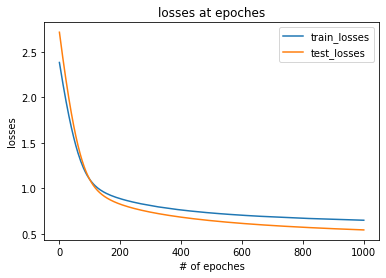

In [6]:
num_epoches = np.arange(1,1001)
a = train_losses
b = test_losses  
plt.plot(num_epoches, a, label = 'train_losses')
plt.plot(num_epoches, b, label = 'test_losses')
plt.xlabel('# of epoches') 
plt.ylabel('losses')
plt.title('losses at epoches') 
plt.legend()
plt.show()    
    

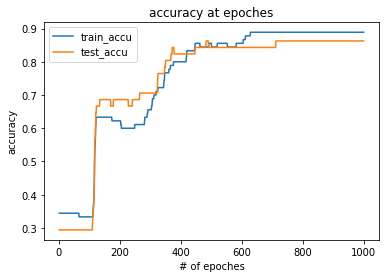

In [7]:
num_epoches = np.arange(1,1001)
a = train_accu
b = test_accu  
plt.plot(num_epoches, a, label = 'train_accu')
plt.plot(num_epoches, b, label = 'test_accu')
plt.xlabel('# of epoches') 
plt.ylabel('accuracy')
plt.title('accuracy at epoches') 
plt.legend()
plt.show()    
    

In [9]:
print(train_accu[-1],test_accu[-1])

0.8888888888888888 0.8627450980392157


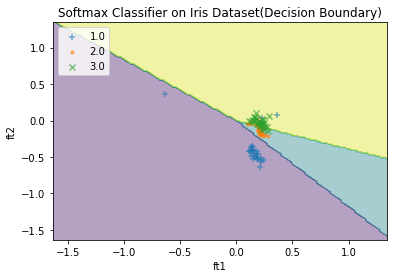

In [8]:
x_min, x_max = train_ft[:, 0].min() - 1, train_ft[:, 0].max() + 1
y_min, y_max = train_ft[:, 1].min() - 1, train_ft[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

xy_pair = np.array([xx.ravel(), yy.ravel()])
scores = np.dot(xy_pair.T, wt)
prob = softmax(scores)
z = np.argmax(prob, axis = 1) + 1
Z = z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

markers = ('+', '.', 'x')
colors = ('purple', 'dimgray', 'green')
cmap = ListedColormap(colors[:len(np.unique(train_label))])
    # Plot also the training points
for idx, cl in enumerate(np.unique(train_label)):
    xBasedOnLabel = train_ft[np.where(train_data[:,0] == cl)]
    plt.scatter(x=xBasedOnLabel[:, 0], y=xBasedOnLabel[:, 1],           
                alpha=0.6, marker = markers[idx], label=cl)
    
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("ft1")
plt.ylabel("ft2")
plt.title("Softmax Classifier on Iris Dataset(Decision Boundary)")
plt.xticks()
plt.yticks()
plt.legend(loc='upper left')
plt.show()